<a href="https://colab.research.google.com/github/ruthwick-2484/Aiml_2303A52484/blob/main/aiml_lab_exam_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')
   Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                64.000000   
2                     0.0               1                 0.000000   
3   

<ipython-input-25-37de898b494b>:50: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  most_purchases_month = data.groupby('Month')['Revenue'].sum().idxmax()


Classification Report:
              precision    recall  f1-score   support

       False       0.91      0.97      0.93      2055
        True       0.75      0.50      0.60       411

    accuracy                           0.89      2466
   macro avg       0.83      0.73      0.77      2466
weighted avg       0.88      0.89      0.88      2466

Accuracy: 0.8880778588807786
Feature Importance:
PageValues                       0.370123
ExitRates                        0.092503
ProductRelated_Duration          0.092167
ProductRelated                   0.079339
Administrative_Duration          0.060280
BounceRates                      0.059990
Administrative                   0.047054
TrafficType                      0.035387
Region                           0.033204
Informational_Duration           0.029590
Browser                          0.021643
OperatingSystems                 0.019640
Informational                    0.018594
VisitorType_Returning_Visitor    0.012201
Weekend      

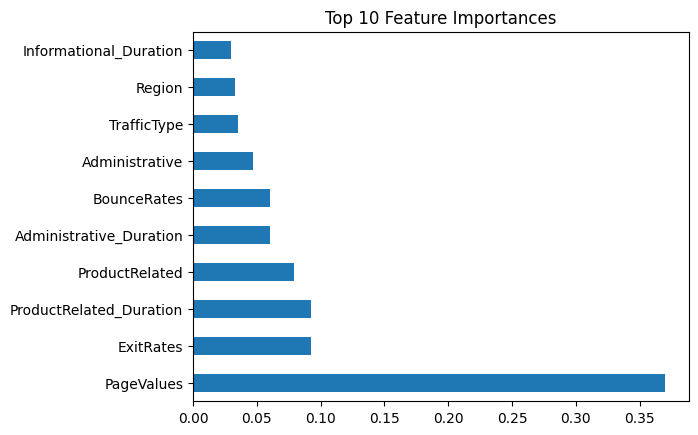

In [25]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Load the dataset
# Replace 'dataset.csv' with the path to your file
data = pd.read_csv('/content/online_shoppers_intention.csv')

# Check the actual column names in your DataFrame
print(data.columns)

# Exploratory Data Analysis
print(data.head())
print(data.info())
print(data.describe())

# 1. Name the product most liked and purchased
# Assuming the column containing product information is named 'ProductRelated' or 'ProductRelated_Duration'
# Please adjust the column name based on the output of data.columns
most_purchased_product = data['ProductRelated_Duration'].value_counts().idxmax()
# If 'ProductRelated' is the correct column, use:
# most_purchased_product = data['ProductRelated'].value_counts().idxmax()
print("Most purchased product:", most_purchased_product)

# 2. Identify the special days when most products are purchased
special_day_purchases = data.groupby('SpecialDay')['Revenue'].sum()
most_purchased_special_day = special_day_purchases.idxmax()
print("Special day with most purchases:", most_purchased_special_day)

# 3. List the top 5 special days of purchase and type of visitors
top_5_special_days = (
    data.groupby(['SpecialDay', 'VisitorType'])['Revenue']
    .sum()
    .sort_values(ascending=False)
    .head(5)
)
print("Top 5 special days of purchase and type of visitors:")
print(top_5_special_days)

# 4. Identify the months when most purchases happened
data['Month'] = pd.Categorical(data['Month'], categories=[
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
], ordered=True)
most_purchases_month = data.groupby('Month')['Revenue'].sum().idxmax()
print("Month with most purchases:", most_purchases_month)

# 5. Find the maximum and minimum revenue generated by the online shoppers
max_revenue = data['Revenue'].max()
min_revenue = data['Revenue'].min()
print("Maximum revenue:", max_revenue)
print("Minimum revenue:", min_revenue)

# Machine Learning: Predict Purchase Intentions
# Assuming 'Revenue' is the target variable (1 for purchase, 0 for no purchase)
X = data.drop(columns=['Revenue'])  # Features
y = data['Revenue']  # Target variable

# Convert categorical data into dummy variables
X = pd.get_dummies(X, drop_first=True)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

# Feature Importance
feature_importance = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
print("Feature Importance:")
print(feature_importance)

# Visualize feature importance
feature_importance[:10].plot(kind='barh', title='Top 10 Feature Importances')
plt.show()
